In [1]:
# General & data preparation
import pandas as pd

# Data vizualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model and evaluation
import sklearn as scikit_learn
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the datasets
df_it1 = pd.read_csv("Data/set8_it1_cleaned.csv")
df_it2 = pd.read_csv("Data/set8_it2.csv")

## **DATA UNDERSTANDING - add on dataset**

In [3]:
df_it2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


## **DATA PREPARATION**
* Initial merging of the cleaned dataset and the add-on dataset
* Cleaning duplicates to not have any missing values
* Setting initial calculations based on the income, loan, downpayments, etc

In [4]:
# Remove duplicate rows
df_it2 = df_it2.drop_duplicates()

In [5]:
# left merge on the cleaned dataset
df = df_it1.merge(df_it2, on='DI', how='left')

In [6]:
df.head(1)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,StructuralIntegrity,ExteriorCharm
0,0,125000.0,Meadowlands,Shadowmere,1032.0,9280.0,sqft,6,Common


## Assignment:
When buying a home, you need to take into account the mortgage that needs to be paid monthly. Assume the following:
* Income = 30000
* Interest rate per year: 4%
* Loan term = 30 years
* Downpayment = 20% of TradeValue

1. The loan that will determine the monthly payments, is the TradeValue minus the Downpayment (assume the household has that saved up). 
2. Figure out the total number of payments that need to be made over the entire loan term (each month during the entire loan term)
3. Calculate the monthly interest rate from the yearly interest rate, by dividing it by the amount of months in a year

To calculate the monthly payment, use: monthly payment = ( loan * interest per month * (1+ interest rate per month) ^ total number of payments  ) / ((1 + monthly interest rate) ^ payments - 1) or: P⋅r⋅(1+r)n(1+r)n−1

Where:
* P= loan amount
* r = monthly interest rate
* n = total number of payments

In [7]:
# Constants
annual_income = 30000
monthly_income = annual_income / 12
interest_rate_year = 0.04
interest_rate_month = interest_rate_year / 12
loan_term = 30
total_payments = loan_term * 12
df["Downpayment"] = df["TradeValue"] * 0.2
df["LoanAmount"] = df["TradeValue"] - df["Downpayment"]

# Monthly mortgage payment
df["MonthlyPayment"] = (
    df["LoanAmount"] * interest_rate_month * (1 + interest_rate_month) ** total_payments) / ((1 + interest_rate_month) ** total_payments - 1)

# Determine affordability
df["AffordableDwelling"] = (df["MonthlyPayment"] <= (0.3 * monthly_income)).astype(int)

# Affordability percentage by enclave
affordability_by_enclave = df.groupby("Enclave")["AffordableDwelling"].mean() * 100

## **DATA UNDERSTANDING**

In [8]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize,StructuralIntegrity,Downpayment,LoanAmount,MonthlyPayment,AffordableDwelling
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,1173.400301,166555.341035,1092.845806,9000.326368,5.594174,33311.068207,133244.272828,636.128539,0.748368
std,673.780281,57277.850994,316.145836,3252.942449,1.117718,11455.570199,45822.280796,218.762577,0.434060
min,0.000000,12789.000000,256.000000,1470.000000,1.000000,2557.800000,10231.200000,48.845314,0.000000
25%,587.500000,128000.000000,843.000000,7200.000000,5.000000,25600.000000,102400.000000,488.873263,0.000000
50%,1178.000000,155000.000000,1070.000000,9069.000000,5.000000,31000.000000,124000.000000,591.994966,1.000000
75%,1756.500000,196750.000000,1289.500000,10955.000000,6.000000,39350.000000,157400.000000,751.451675,1.000000
max,2339.000000,337000.000000,2066.000000,17920.000000,9.000000,67400.000000,269600.000000,1287.111637,1.000000


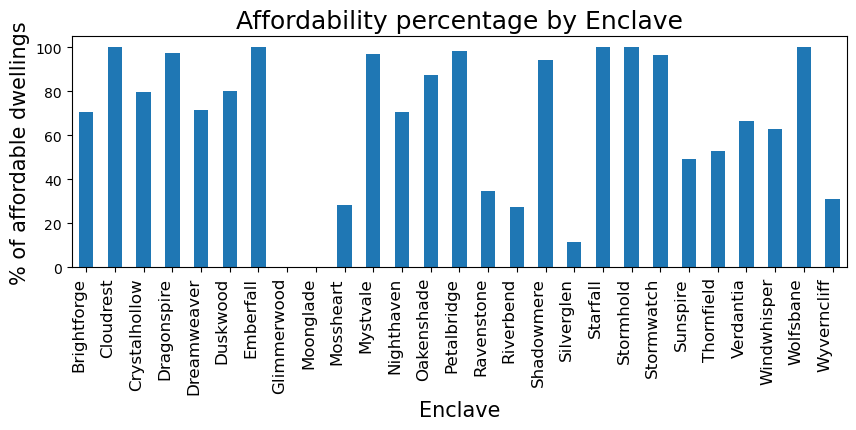

In [9]:
# Bar char showing affordability percentage by Enclave
plt.figure(figsize=(10, 3))
affordability_by_enclave.plot.bar()
plt.title("Affordability percentage by Enclave", fontsize=18)
plt.xlabel("Enclave", fontsize=15)
plt.ylabel("% of affordable dwellings", fontsize=15)
plt.xticks(ha='right', rotation=90, fontsize=12)
plt.show()

In [10]:
# We are transforming the categorical data into numerical using the label encoder
df2 = df.copy()
df2 = df2.drop(columns=["ParcelSizeUnit", "DI", "Downpayment", "MonthlyPayment", "LoanAmount"])

label_encoder = LabelEncoder()
df2['RealmType'] = label_encoder.fit_transform(df['RealmType'])
df2['Enclave'] = label_encoder.fit_transform(df['Enclave'])
df2['ExteriorCharm'] = label_encoder.fit_transform(df['ExteriorCharm'])

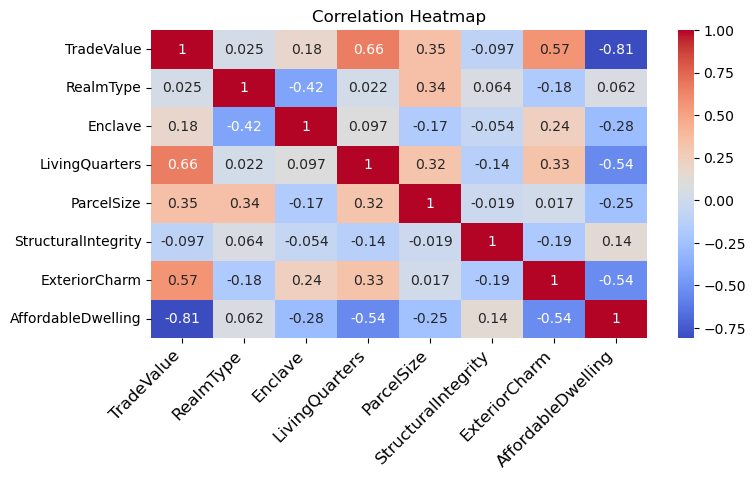

In [11]:
# Visualize the correlation with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm")
plt.xticks(ha='right', rotation=45, fontsize=12)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df["ExteriorCharm"].unique()

array(['Common', 'Gleaming', 'Modest', 'Enchanting'], dtype=object)